# sLDSC partitioned heritability analysis

In [1]:
library(ggplot2)
library(dplyr)
library(data.table)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
setwd("~/project-gandalm/isoform_twas/sLDSC/")

### QQ-plot

In [13]:
gwa <- fread("/u/project/gandalm/shared/GWAS/SCZ.Pardinas.PGC.2018/CLOZUK_rsFiltered_SNP_P.txt", data.table = F)

In [37]:
dim(gwa)
head(gwa)

[1] 8167163       2

,SNP,P
,<chr>,<dbl>
1,rs10000000,0.9394
2,rs1000000,0.0954
3,rs10000003,0.9528
4,rs10000005,0.2889
5,rs10000006,0.2149
6,rs10000008,0.1561


In [10]:
# observed <- sort(gwa$P)
# lobs <- -(log10(observed))
# expected <- c(1:length(observed))
# lexp <- -(log10(expected / (length(expected)+1)))

In [11]:
# pdf("figures/qqplot.pdf", width=6, height=6)
# plot(c(0,7), c(0,7), col="red", lwd=3, type="l", 
#      xlab="Expected (-logP)", ylab="Observed (-logP)", 
#      xlim=c(0,7), ylim=c(0,7), las=1, xaxs="i", yaxs="i", bty="l")
# points(lexp, lobs, pch=23, cex=.4, bg="black") 
# dev.off()

png 
  2

In [6]:
eqtl_set <- read.table("data/mixed_top_eqtl.txt", header = F, stringsAsFactors = F)
isoqtl_set <- read.table("data/mixed_top_isoqtl_grp_perm.txt", header = F, stringsAsFactors = F)
sqtl_set <- read.table("data/mixed_top_sqtl_grp_perm.txt", header = F, stringsAsFactors = F)

In [7]:
dim(eqtl_set)
dim(isoqtl_set)
dim(sqtl_set)

[1] 9702    1

[1] 11388     1

[1] 6495    1

In [8]:
head(eqtl_set)

,V1
,<chr>
1,rs192563417
2,rs17529513
3,rs4896658
4,rs760969
5,rs497071
6,rs34269469


In [14]:
eqtl_set <- eqtl_set %>% inner_join(gwa, by = c("V1"="SNP"))
head(eqtl_set)
dim(eqtl_set)

,V1,P
,<chr>,<dbl>
1,rs192563417,0.3658000
2,rs17529513,0.4637000
3,rs760969,0.0251000
4,rs497071,0.0611000
5,rs34269469,0.0006905
6,rs13233496,0.0240000


[1] 6376    2

In [15]:
isoqtl_set <- isoqtl_set %>% inner_join(gwa, by = c("V1"="SNP"))
dim(isoqtl_set)
sqtl_set <- sqtl_set %>% inner_join(gwa, by = c("V1"="SNP"))
dim(sqtl_set)

[1] 7542    2

[1] 4297    2

In [16]:
eqtl_qq <- data.frame("lobs" = -(log10(sort(eqtl_set$P))), 
                      "lexp" = -(log10( c(1:nrow(eqtl_set)) / (nrow(eqtl_set)+1) )),
                      "group" = "cis-eQTL")

In [18]:
isoqtl_qq <- data.frame("lobs" = -(log10(sort(isoqtl_set$P))), 
                      "lexp" = -(log10( c(1:nrow(isoqtl_set)) / (nrow(isoqtl_set)+1) )),
                      "group" = "cis-isoQTL")
sqtl_qq <- data.frame("lobs" = -(log10(sort(sqtl_set$P))), 
                      "lexp" = -(log10( c(1:nrow(sqtl_set)) / (nrow(sqtl_set)+1) )),
                      "group" = "cis-sQTL")

In [19]:
qq_df <- rbind(eqtl_qq, isoqtl_qq, sqtl_qq)

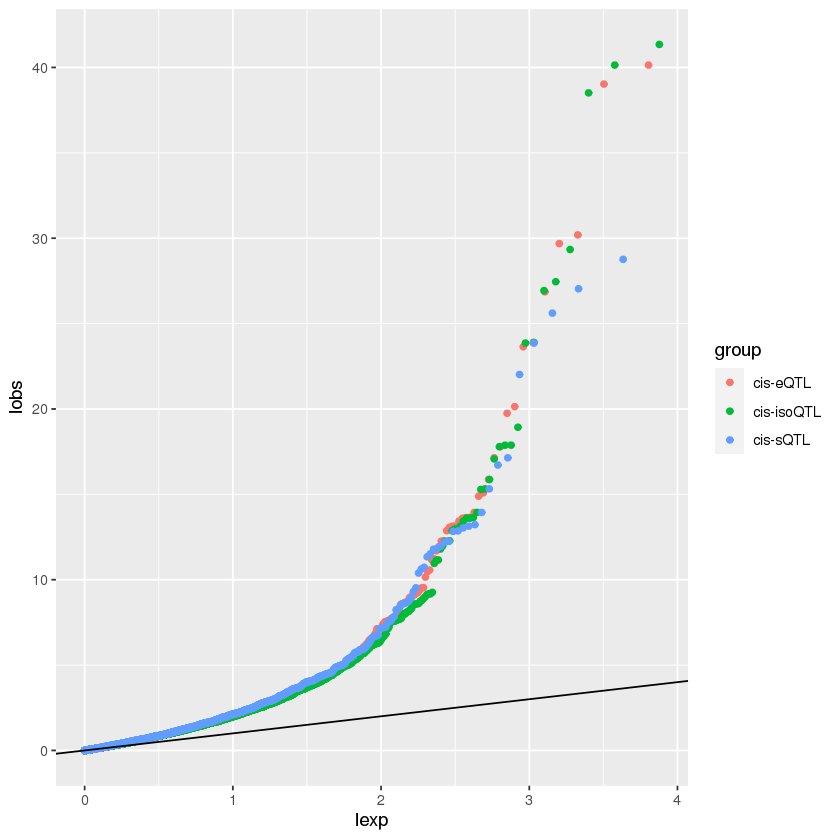

In [23]:
p <- ggplot(qq_df, aes(color = group, x = lexp, y = lobs)) +
    geom_point() +
    geom_abline(slope = 1, intercept = 0)
p

In [40]:
length(Reduce(intersect,list(eqtl_set$V1, isoqtl_set$V1, sqtl_set$V1)))

[1] 237

In [41]:
shared_set <- eqtl_set %>% filter(V1 %in% isoqtl_set$V1, V1 %in% sqtl_set$V1)

In [42]:
dim(shared_set)

[1] 237   2

In [43]:
shared_qq <- data.frame("lobs" = -(log10(sort(shared_set$P))), 
                           "lexp" = -(log10( c(1:nrow(shared_set)) / (nrow(shared_set)+1) )),
                           "group" = "cis-e/iso/sQTL shared")

In [24]:
eqtl_only_set <- eqtl_set %>% filter(!V1 %in% isoqtl_set$V1, !V1 %in% sqtl_set$V1)
dim(eqtl_only_set)

[1] 4176    2

In [25]:
isoqtl_only_set <- isoqtl_set %>% filter(!V1 %in% eqtl_set$V1, !V1 %in% sqtl_set$V1)
dim(isoqtl_only_set)
sqtl_only_set <- sqtl_set %>% filter(!V1 %in% eqtl_set$V1, !V1 %in% isoqtl_set$V1)
dim(sqtl_only_set)

[1] 5018    2

[1] 3516    2

In [26]:
eqtl_only_qq <- data.frame("lobs" = -(log10(sort(eqtl_only_set$P))), 
                           "lexp" = -(log10( c(1:nrow(eqtl_only_set)) / (nrow(eqtl_only_set)+1) )),
                           "group" = "cis-eQTL only")
isoqtl_only_qq <- data.frame("lobs" = -(log10(sort(isoqtl_only_set$P))), 
                           "lexp" = -(log10( c(1:nrow(isoqtl_only_set)) / (nrow(isoqtl_only_set)+1) )),
                           "group" = "cis-isoQTL only")
sqtl_only_qq <- data.frame("lobs" = -(log10(sort(sqtl_only_set$P))), 
                           "lexp" = -(log10( c(1:nrow(sqtl_only_set)) / (nrow(sqtl_only_set)+1) )),
                           "group" = "cis-sQTL only")

In [44]:
qq_only <- rbind(eqtl_only_qq, isoqtl_only_qq, sqtl_only_qq, shared_qq)

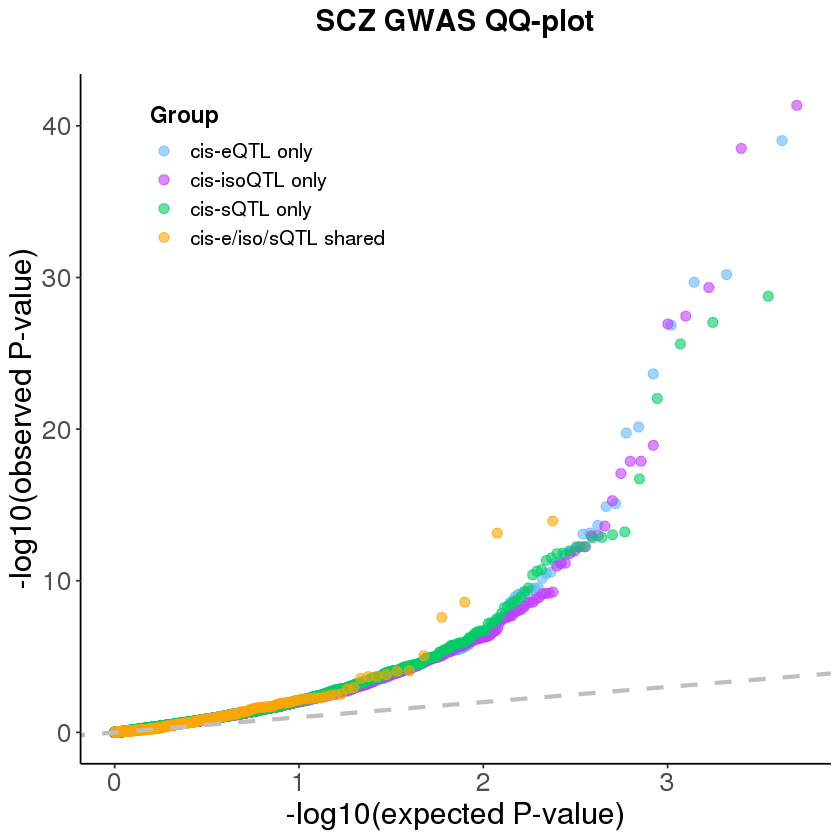

In [57]:
p <- ggplot(qq_only, aes(color = group, x = lexp, y = lobs)) +
    geom_point(size = 2.5, alpha = .6) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 1.2, color = "grey") +
  scale_color_manual(name = "Group", values = colors) +
  ggtitle("SCZ GWAS QQ-plot", subtitle = "") +
  xlab("-log10(expected P-value)") +
  ylab("-log10(observed P-value)") +
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face="bold", hjust = 0.5),
        legend.position = c(0.25, 0.85),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12))
p

In [ ]:
ggsave("figures/qqplot.png", p, width = 6, height = 6)

### Quick and dirty: plot eQTL, isoQTL, sQTL together, with the same statistics for BG annotations, which are slightly different between QTL sets (univariate model)

In [3]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_0bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

In [4]:
isoqtl <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_grp_perm_0bp.results", header = T, stringsAsFactors = F)
isoqtl$Enrichment_p_fdr <- p.adjust(isoqtl$Enrichment_p, "fdr")
isoqtl[isoqtl$Category=="L2_1",1] <- "isoQTL"
isoqtl <- isoqtl %>% filter(Category == "isoQTL")
sqtl <- read.table("results/SCZ.Clozuk.2018_mixed_top_sqtl_grp_perm_0bp.results", header = T, stringsAsFactors = F)
sqtl$Enrichment_p_fdr <- p.adjust(sqtl$Enrichment_p, "fdr")
sqtl[sqtl$Category=="L2_1",1] <- "sQTL"
sqtl <- sqtl %>% filter(Category == "sQTL")
subset_dat <- rbind(subset_dat, isoqtl, sqtl)

In [5]:
# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

In [6]:
subset_dat$group <- "Baseline"
for(i in 1:nrow(subset_dat)) {
    if(subset_dat[i,'Category'] == "eQTL") {
        subset_dat[i,'group'] <- "eQTL"
    }
    if(subset_dat[i,'Category'] == "isoQTL") {
        subset_dat[i,'group'] <- "isoQTL"
    }
    if(subset_dat[i,'Category'] == "sQTL") {
        subset_dat[i,'group'] <- "sQTL"
    }
}
# subset_dat$color_cat <- factor(subset_dat$color_cat, levels = c("Baseline", "eQTL", "isoQTL", "sQTL"))

In [7]:
# display <- c("sQTL", "isoQTL", "eQTL", rep("", 14))

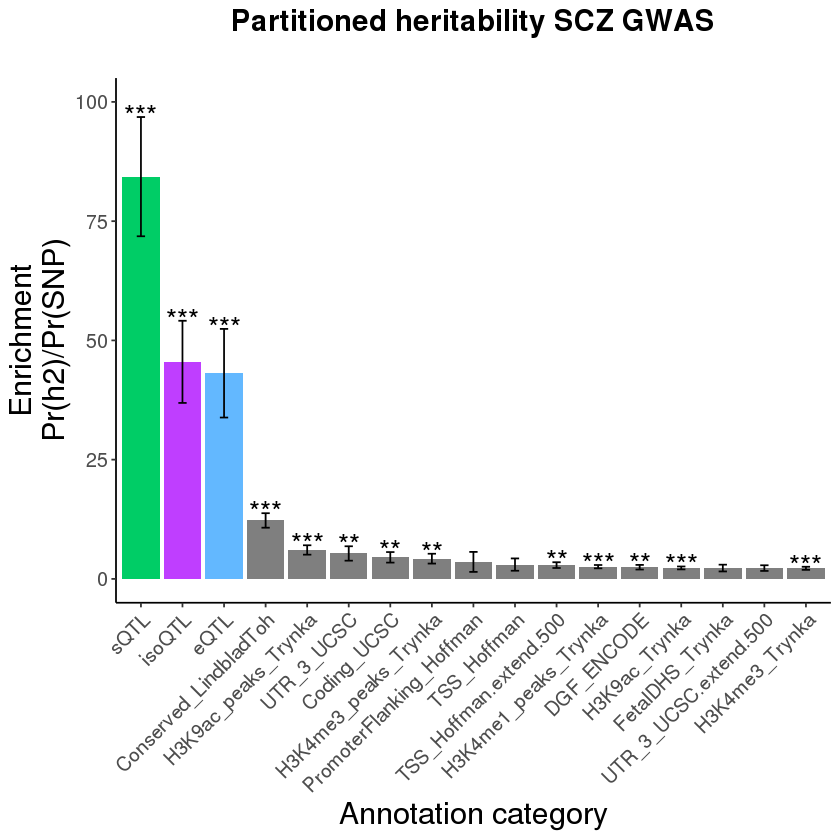

In [7]:
p <- ggplot(subset_dat, aes(x = reorder(Category,-Enrichment), 
                            y = Enrichment)) +
  geom_bar(stat = "identity", width = .9, aes(fill = group)) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), 
                    ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50", "steelblue1", "darkorchid1", "springgreen3")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=12),
        axis.text.y = element_text(size=12),
        axis.title = element_text(size=18),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,100) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6) 
#   scale_x_discrete(labels = display)
            
p

In [8]:
ggsave("figures/SCZ.Clozuk.2018_mixed_top_e_iso_s_qtl_0bp_window.png", p, height=6, width=6)

### SCZ, mixed top eQTL

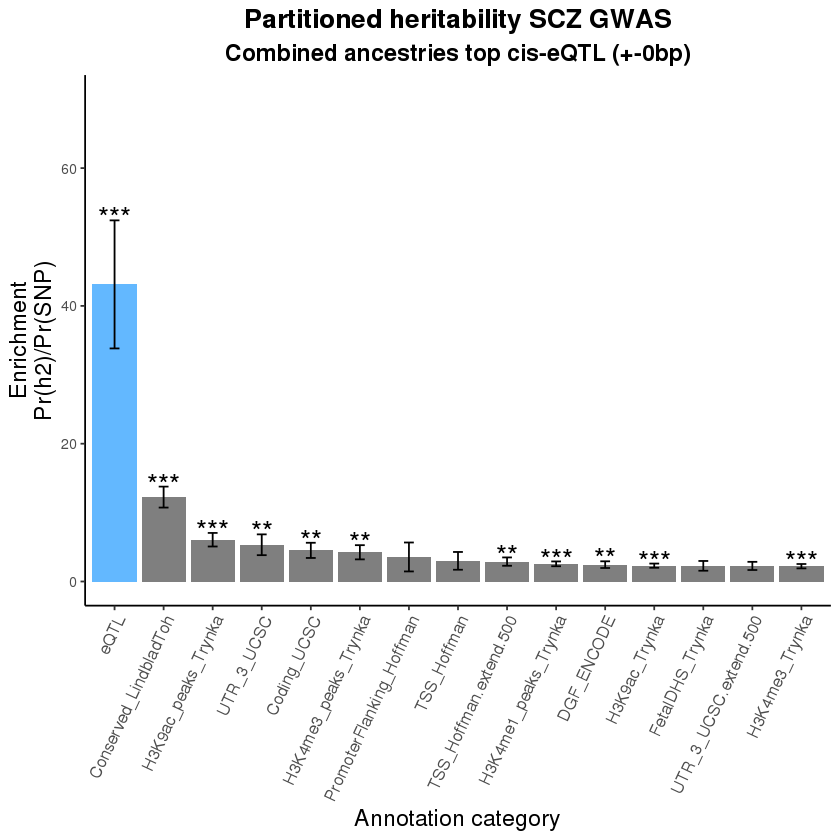

In [5]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_0bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p1 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-0bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,70) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p1
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/SCZ.Clozuk.2018_mixed_top_eqtl_0bp_window.png", p1, height=6, width=6)

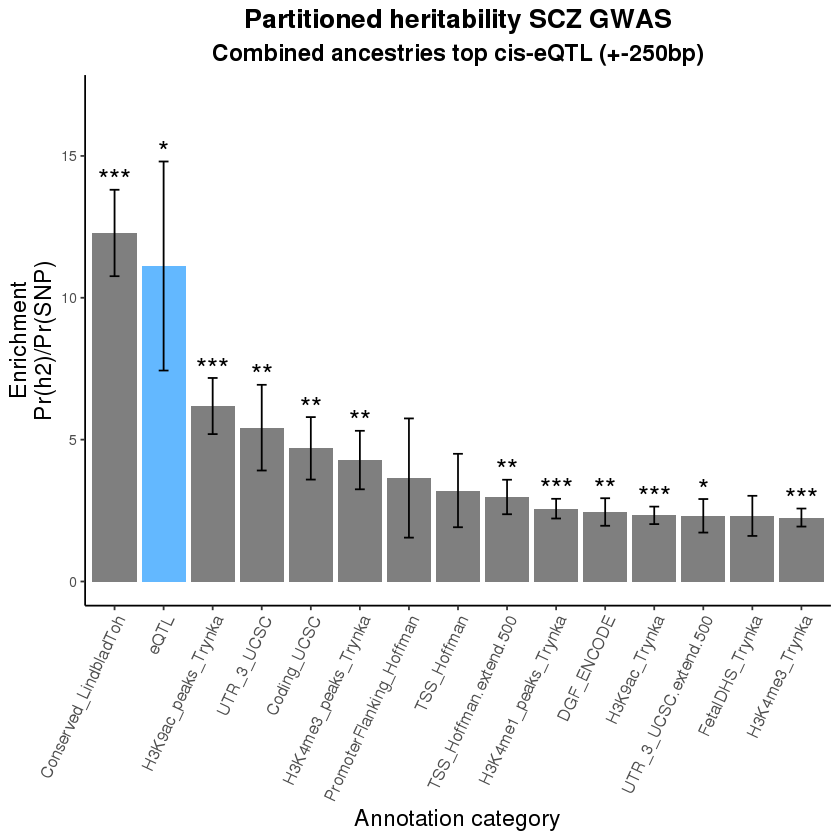

In [17]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_250bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p2 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-250bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,17) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p2
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/SCZ.Clozuk.2018_mixed_top_eqtl_250bp_window.png", p2, height=6, width=6)

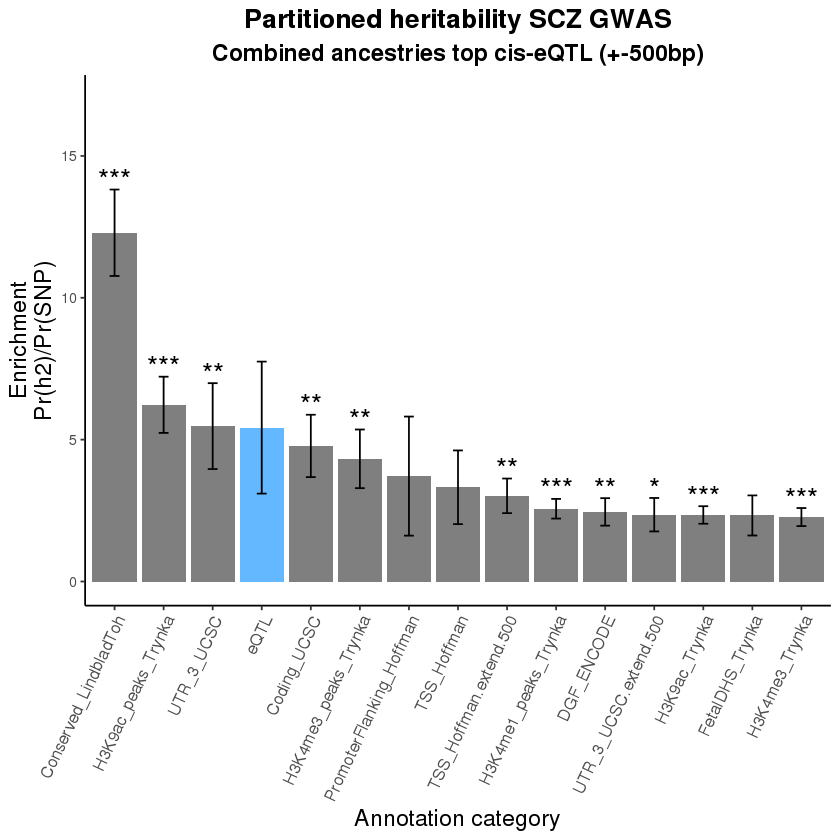

In [8]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_500bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p3 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-500bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,17) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p3

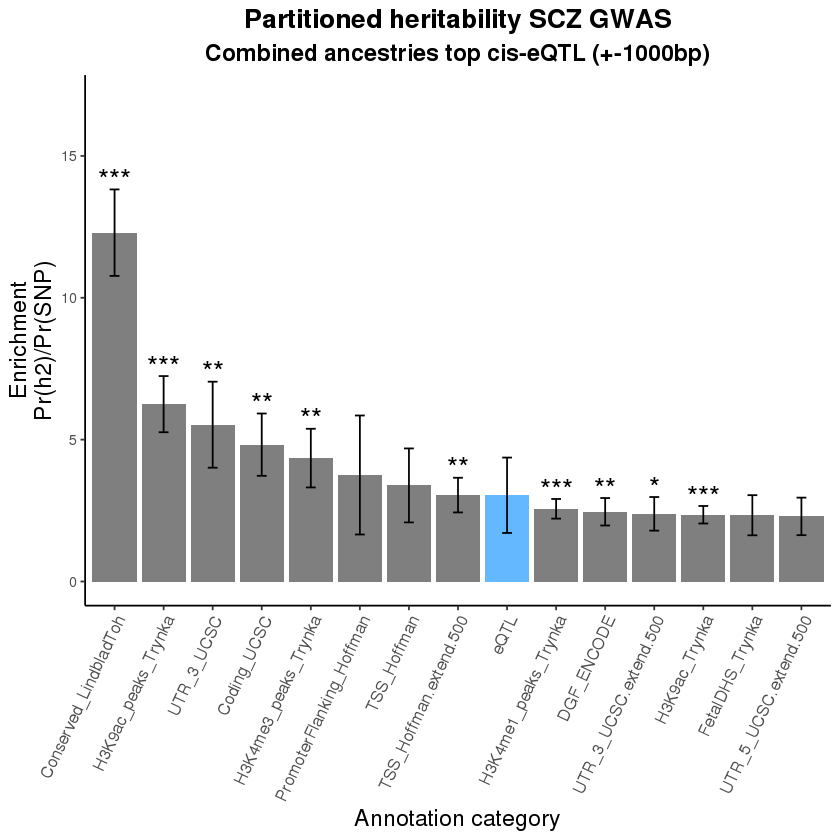

In [9]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_1000bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p4 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-1000bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,17) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p4

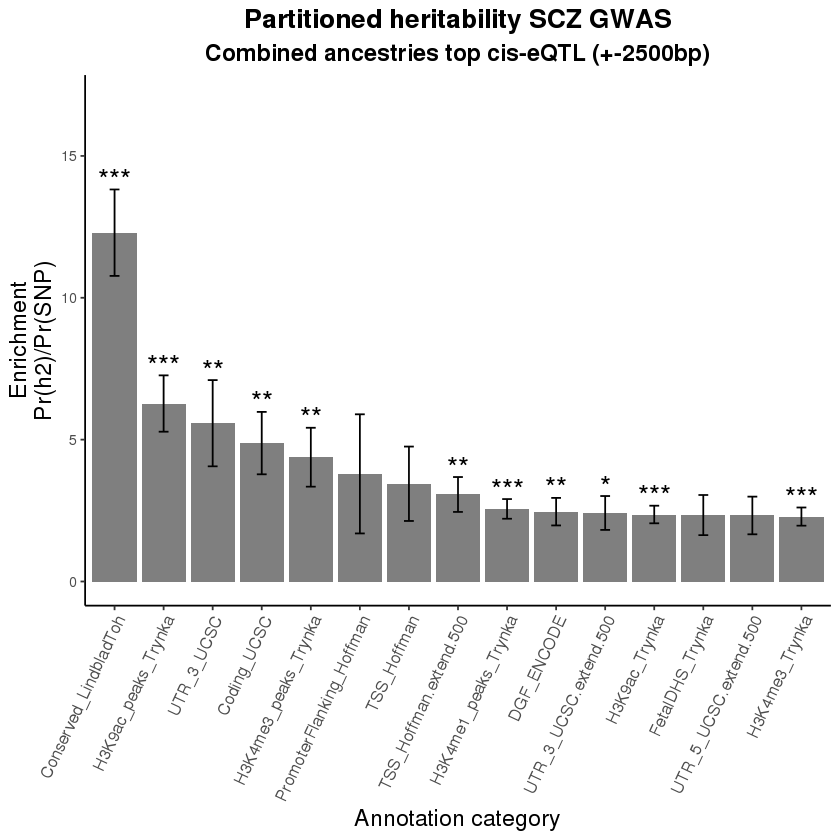

In [10]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_2500bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p5 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-2500bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,17) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p5

### More GWAS, mixed top eQTL
Now omitting bonferroni correction and significance level. Need to calculate that within each trait.

In [7]:
setwd("./results/")
results <- list.files(pattern = "*_mixed_top_eqtl.results")

In [12]:
results

[1] "ALZ.Jansen.2019_mixed_top_eqtl.results"               
[2] "ASD.iPSYCHPGC.2018_mixed_top_eqtl.results"            
[3] "BD.PGC3_mixed_top_eqtl.results"                       
[4] "EduYears.SSGAC.Lee2018_mixed_top_eqtl.results"        
[5] "Insomnia.Jansen.2018_mixed_top_eqtl.results"          
[6] "Intelligence.SavageNatGen.2018_mixed_top_eqtl.results"
[7] "MDD.PGC.2018_mixed_top_eqtl.results"                  
[8] "SCZ.Clozuk.2018_mixed_top_eqtl.results"

In [19]:
strsplit(results[1], split="_")[[1]][1]

[1] "ALZ.Jansen.2019"

In [20]:
for (i in 1:length(results)) {
    file_name <- strsplit(results[i], split = "_")[[1]][1]
    file_df <- read.table(results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

In [21]:
ls()

[1] "ALZ.Jansen.2019"                "ASD.iPSYCHPGC.2018"            
 [3] "BD.PGC3"                        "EduYears.SSGAC.Lee2018"        
 [5] "file_df"                        "file_name"                     
 [7] "i"                              "Insomnia.Jansen.2018"          
 [9] "Intelligence.SavageNatGen.2018" "MDD.PGC.2018"                  
[11] "myfiles"                        "results"                       
[13] "SCZ.Clozuk.2018"                "trait"                         
[15] "traits"

In [28]:
df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
df <- df %>% filter(Category == "L2_1")
df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")

In [29]:
df

Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,Trait
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
L2_1,0.002999584,0.01578311,0.082270743,5.261766,27.427380,0.8896232304,1.247765e-09,5.516238e-08,0.02261985,ALZ.Jansen.2019
L2_1,0.002999584,0.02742948,0.026950328,9.144425,8.984687,0.3619978424,2.302563e-07,2.609979e-07,0.88221520,ASD.iPSYCHPGC.2018
L2_1,0.002999584,0.01356646,0.015168311,4.522781,5.056804,0.4860475974,2.800624e-08,5.291421e-08,0.52927633,BD.PGC3
L2_1,0.002999584,0.03083254,0.007876888,10.278937,2.625993,0.0005039176,1.544343e-07,4.486393e-08,3.44228277,EduYears.SSGAC.Lee2018
L2_1,0.002999584,0.02612940,0.015321874,8.711007,5.107999,0.1352008033,4.889490e-08,3.555285e-08,1.37527380,Insomnia.Jansen.2018
L2_1,0.002999584,0.03008507,0.012714436,10.029745,4.238732,0.0343044414,2.438536e-07,1.216811e-07,2.00403824,Intelligence.SavageNatGen.2018
L2_1,0.002999584,0.01330874,0.018576135,4.436860,6.192903,0.5807367638,3.097151e-08,6.431031e-08,0.48159474,MDD.PGC.2018
L2_1,0.002999584,0.03965666,0.011754549,13.220717,3.918726,0.0022177811,7.348389e-07,2.459089e-07,2.98825688,SCZ.Clozuk.2018


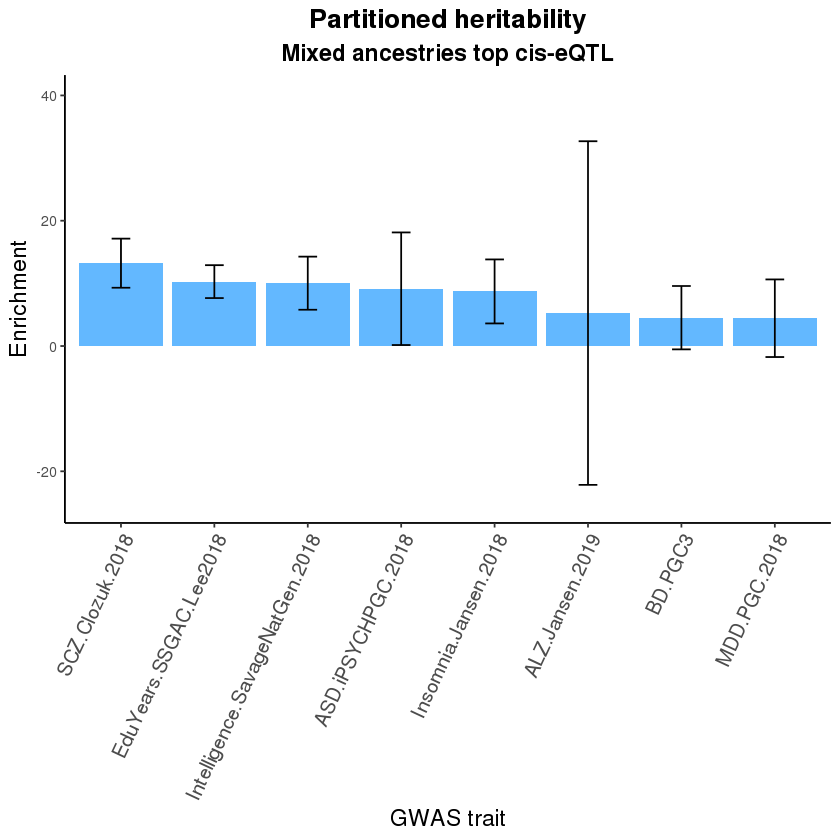

In [82]:
p1 <- ggplot(df, aes(x=reorder(Trait, -Enrichment), y=Enrichment)) +
  geom_bar(stat = "identity", width = .9, fill="steelblue1") +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  ggtitle("Partitioned heritability", subtitle = "Mixed ancestries top cis-eQTL") +
  xlab("GWAS trait") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=12),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(-25,40)
#   scale_fill_brewer(palette="Set1")
#   scale_fill_manual(values = wes_palette(n=8, name="Moonrise3", type="continuous"))
p1

In [86]:
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/enrichment_mixed_top_eqtl.png", p1, width = 6, height = 6)

### SCZ, mixed top isoQTL per isoGene (???)

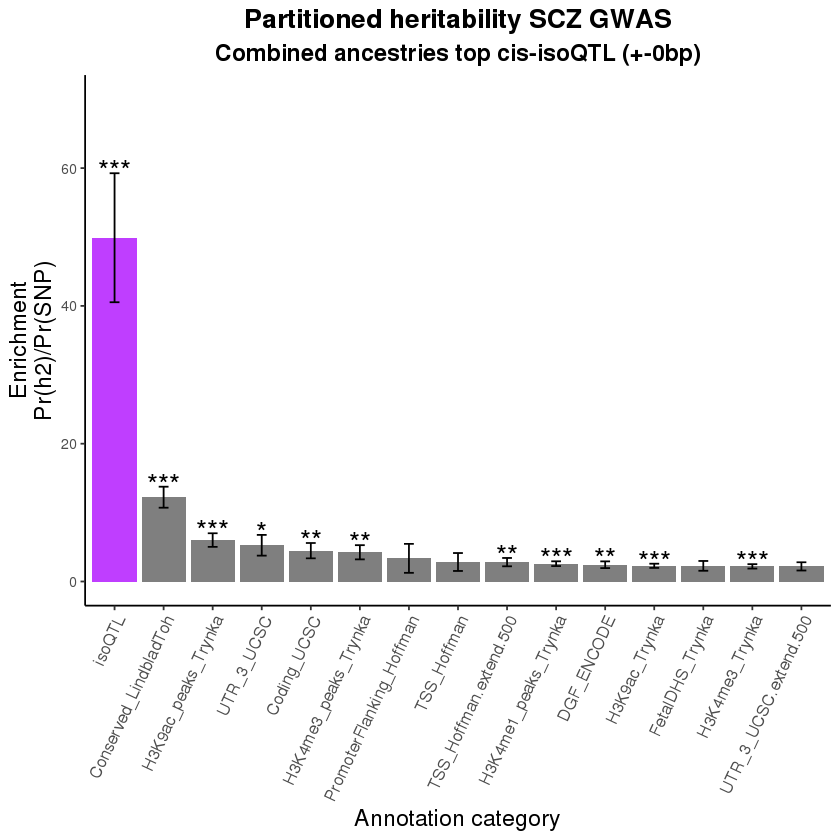

In [4]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_0bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-isoQTL (+-0bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,70) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/SCZ.Clozuk.2018_mixed_top_isoqtl_0bp_window.png", p, height = 6, width = 6)

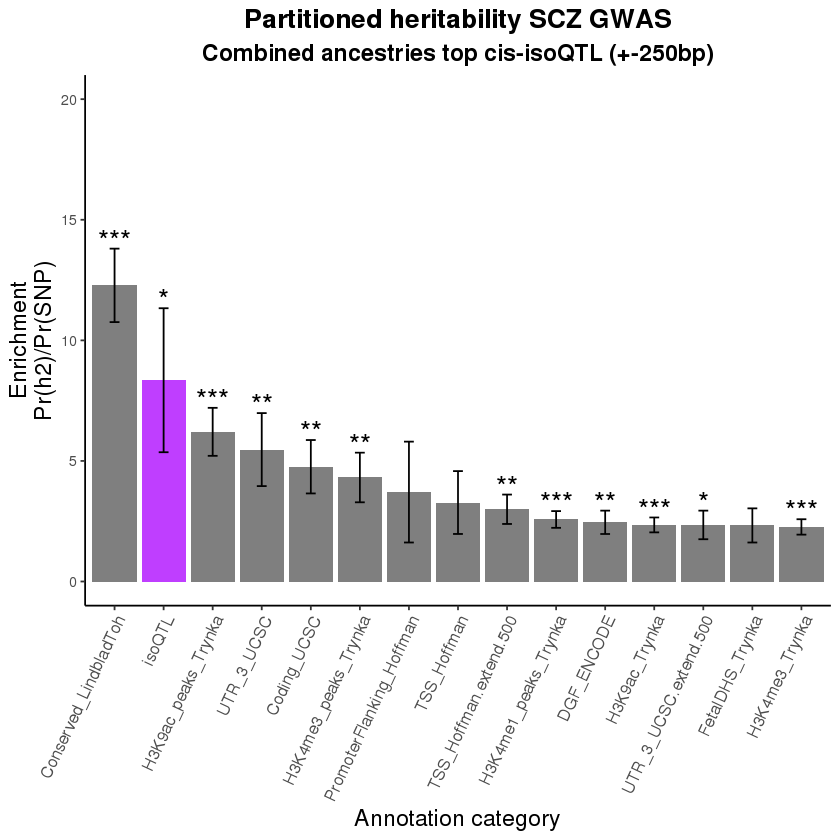

In [18]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_250bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-isoQTL (+-250bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/SCZ.Clozuk.2018_mixed_top_isoqtl_250bp_window.png", p, height = 6, width = 6)

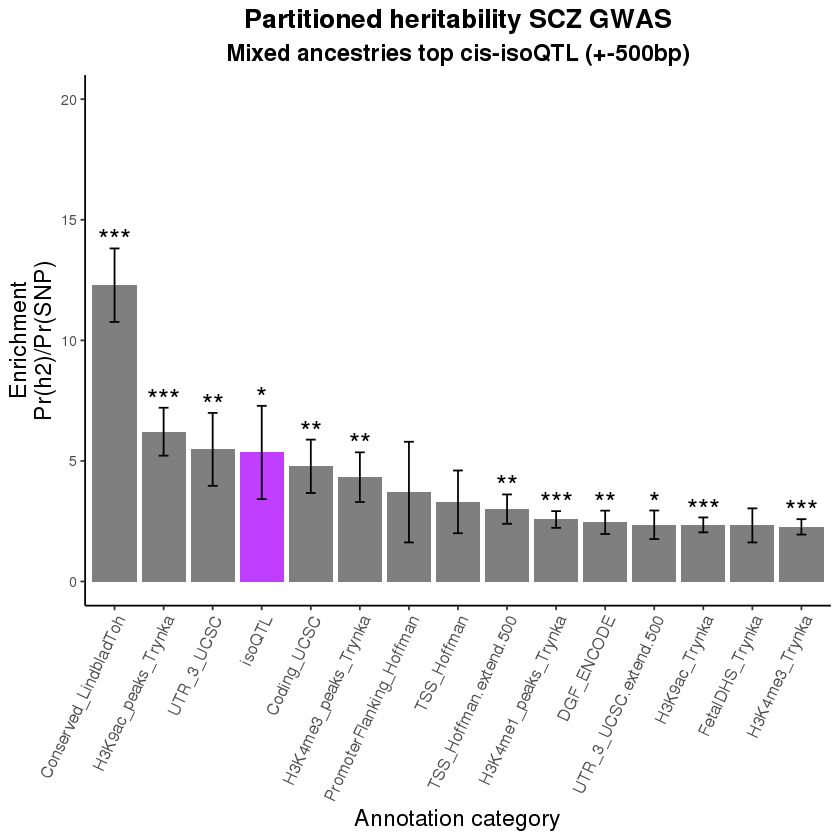

In [13]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_500bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Mixed ancestries top cis-isoQTL (+-500bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

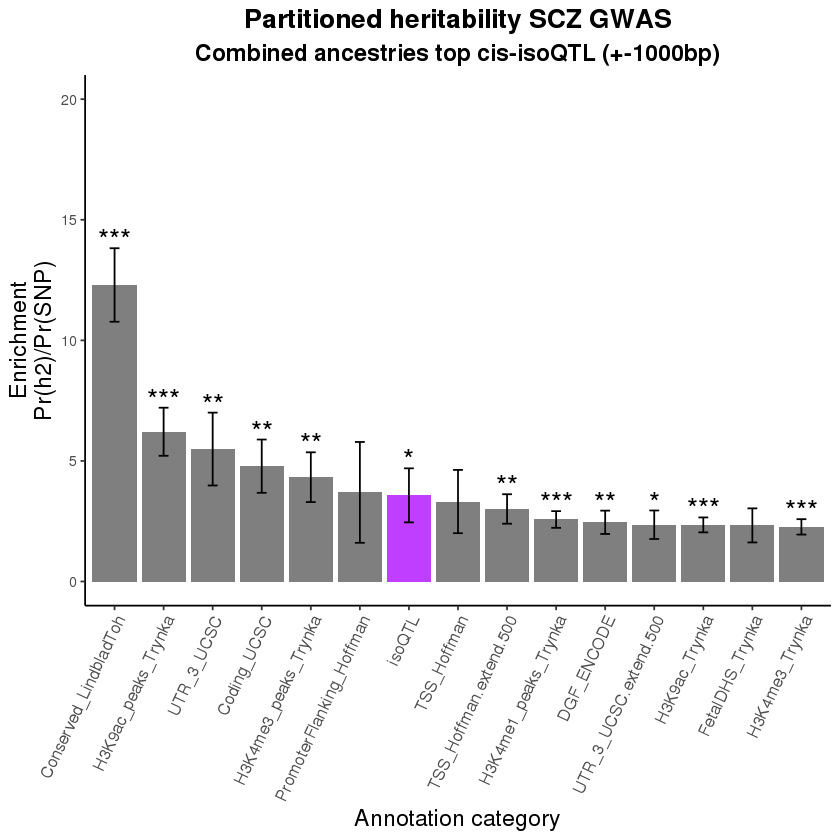

In [14]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_1000bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-isoQTL (+-1000bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

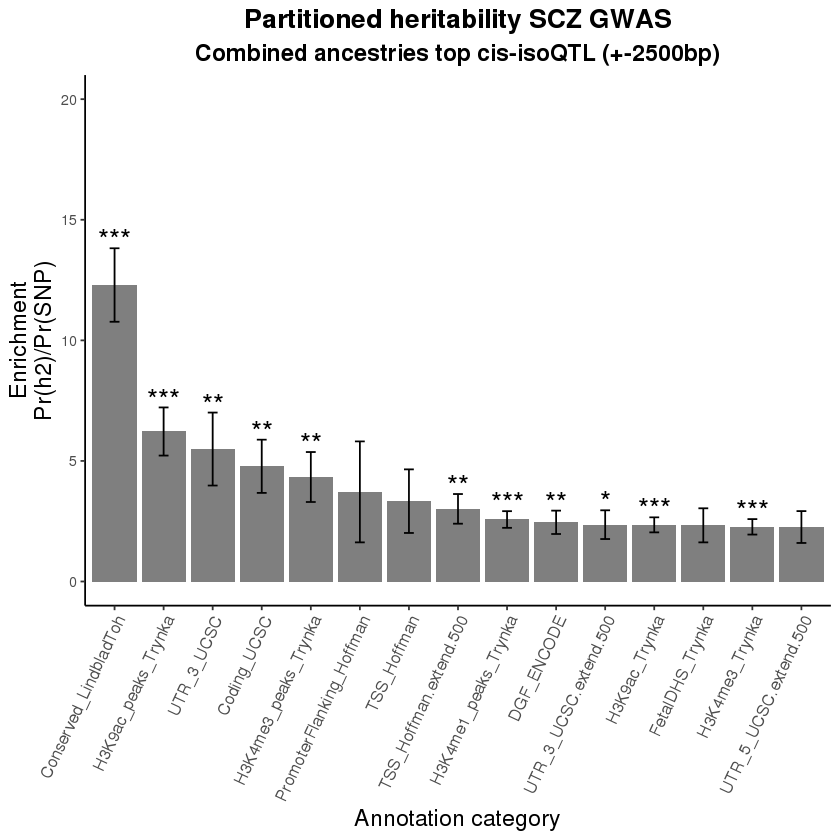

In [15]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_2500bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-isoQTL (+-2500bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

### More GWAS, top isoQTL

In [4]:
setwd("./results/")
results <- list.files(pattern = "*_mixed_top_isoqtl.results")

In [5]:
for (i in 1:length(results)) {
    file_name <- strsplit(results[i], split = "_")[[1]][1]
    file_df <- read.table(results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
df <- df %>% filter(Category == "L2_1")
df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")

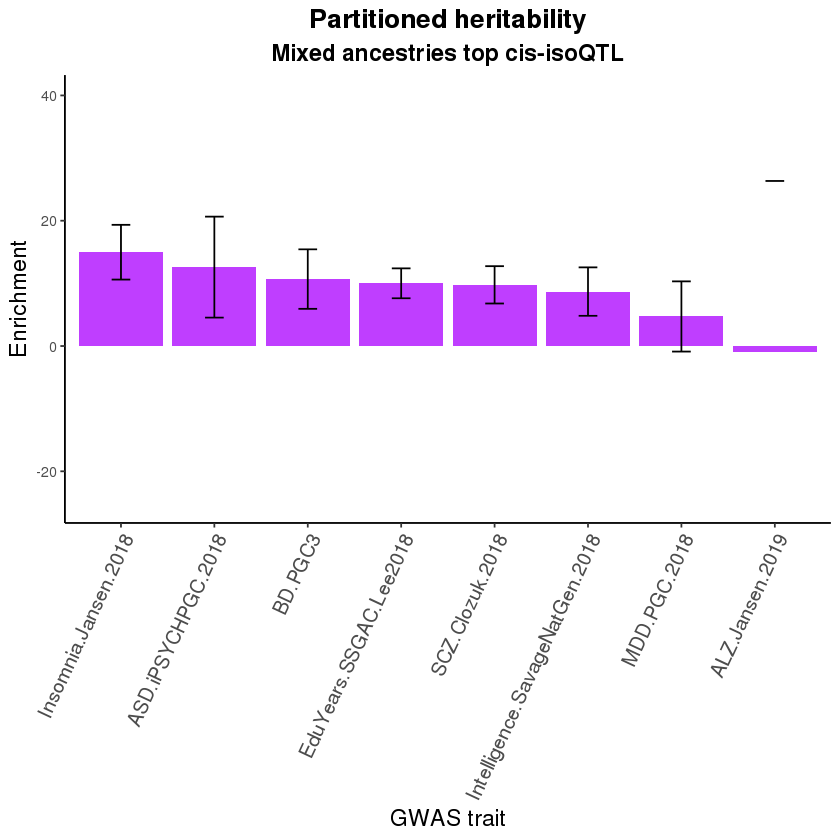

In [11]:
p1 <- ggplot(df, aes(x=reorder(Trait, -Enrichment), y=Enrichment)) +
  geom_bar(stat = "identity", width = .9, fill="darkorchid1") +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  ggtitle("Partitioned heritability", subtitle = "Mixed ancestries top cis-isoQTL") +
  xlab("GWAS trait") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=12),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(-25,40)
#   scale_fill_brewer(palette="Set1")
#   scale_fill_manual(values = wes_palette(n=8, name="Moonrise3", type="continuous"))
p1

In [12]:
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/enrichment_mixed_top_isoqtl.png", p1, width = 6, height = 6)